In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# чтение данных

d = pd.read_csv('a.csv')
dbuf = d[:]
d = d.sort_values('x').reset_index(drop=True)

In [3]:
# интервальный вар-ряд

buf = d[:]
ln = d.x.__len__() - 1
h = (d.x[ln] - d.x[0]) // 9

bins = [d.x[0] - 1] + list(range(d.x[0] + h, d.x[ln] + h, h))

buf['interval'] = pd.cut(buf.x, bins=bins, labels=[f'{i}-{j}' for i, j in zip([_ + 1 for _ in bins[:-1]], [_ + 1 for _ in bins[1:]])])
buf = buf.groupby('interval').x.apply(list).reset_index()
buf['count'] = buf.x.apply(len)

buf[['interval', 'count']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18260\2997406380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buf['interval'] = pd.cut(buf.x, bins=bins, labels=[f'{i}-{j}' for i, j in zip([_ + 1 for _ in bins[:-1]], [_ + 1 for _ in bins[1:]])])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18260\2997406380.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  buf = buf.groupby('interval').x.apply(list).reset_index()


,interval,count
0,65-69,3
1,69-72,5
2,72-75,6
3,75-78,7
4,78-81,9
5,81-84,7
6,84-87,6
7,87-90,5
8,90-93,2


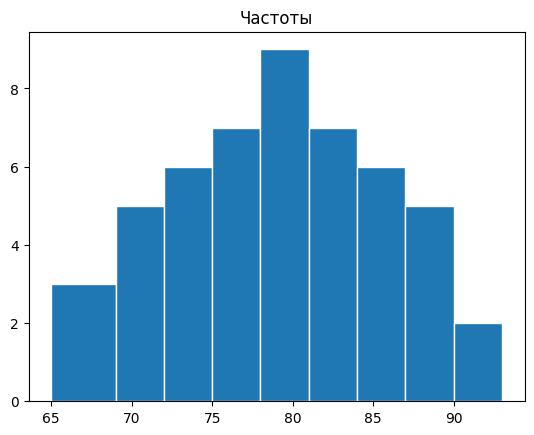

In [4]:
# гиста

plt.hist(d.x, bins=[el + 1 for el in bins], edgecolor='white')
plt.title('Частоты')
plt.show()

In [5]:
# Дискретный вар-ряд

buf['interval'] = buf.interval.apply(lambda x: round((int(x.split('-')[0]) + int(x.split('-')[1])) / 2, 2))
buf[['interval', 'count']]

,interval,count
0,67.0,3
1,70.5,5
2,73.5,6
3,76.5,7
4,79.5,9
5,82.5,7
6,85.5,6
7,88.5,5
8,91.5,2


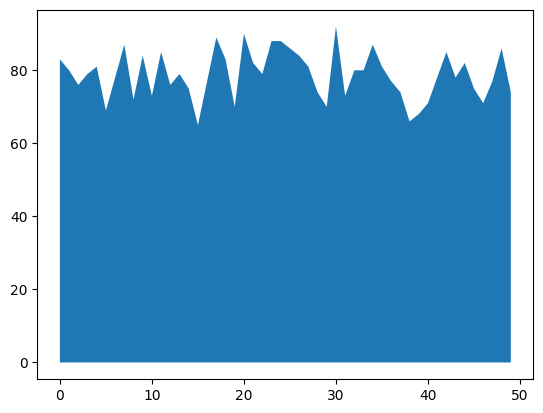

In [6]:
# полигон

dt = tuple(dbuf.x)

poly = plt.Polygon(
     [(i, dt[i]) for i in range(len(dt))] + [(len(dt) - 1, 0), (0, 0)],
)

fig, ax = plt.subplots()
ax.add_patch(poly)
ax.autoscale()
plt.show()